### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [63]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
df = pd.read_csv(wine_data_path)


In [64]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [66]:
df.dropna(inplace=True)

In [67]:
df.duplicated().sum()

np.int64(1168)

In [68]:
df.drop_duplicates(inplace=True)

In [69]:
df.shape

(5295, 13)

In [70]:
df['type'].value_counts()

,count
type,
white,3942
red,1353


In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])

In [72]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])

<ipython-input-73-7f1710777546>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.23180022  0.23180022  0.23180022 ... -0.90466476 -0.90466476
  0.23180022]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])


In [74]:
df.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,-0.165087,-0.440021,0.280208,3.477382,-0.316815,0.838865,0.984149,2.177419,-1.401186,-0.555267,-1.475154,0.2318
1,1,-0.695163,-0.261684,0.144245,-0.766859,-0.208407,-0.900220,0.314921,-0.180598,0.472180,-0.288309,-0.885144,0.2318
2,1,0.667890,-0.380575,0.552136,0.410863,-0.181305,-0.002628,-0.301474,0.189947,0.222398,-0.622007,-0.379421,0.2318


In [75]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:],df['type'],test_size = 0.2,random_state=42)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [77]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [78]:
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.9933899905571294


# PCA

In [79]:
from sklearn.decomposition import PCA


In [84]:
for i in range(1,13):

  pca = PCA(n_components=i)

  x_train_trf = pca.fit_transform(x_train)
  x_test_trf = pca.transform(x_test)

  knn = KNeighborsClassifier()

  knn.fit(x_train_trf,y_train)

  y_pred = knn.predict(x_test_trf)
  print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.9726156751652503
Accuracy :  0.9773371104815864
Accuracy :  0.9745042492917847
Accuracy :  0.9848914069877243
Accuracy :  0.987724268177526
Accuracy :  0.987724268177526
Accuracy :  0.9905571293673276
Accuracy :  0.9933899905571294
Accuracy :  0.9924457034938622
Accuracy :  0.9924457034938622
Accuracy :  0.9924457034938622
Accuracy :  0.9933899905571294


# principle components = 7 is perfect

In [81]:
pca = PCA(n_components=7)

x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

knn.fit(x_train_trf,y_train)

y_pred = knn.predict(x_test_trf)
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.9905571293673276


### eigen vectors

In [82]:
pca.components_

array([[-2.91614623e-01, -4.08340840e-01,  1.27259867e-01,
         2.39258431e-01, -3.58270628e-01,  3.98763132e-01,
         4.36518846e-01, -2.15786103e-01, -1.67754175e-01,
        -3.17062089e-01,  5.42724651e-02,  1.36680078e-01],
       [ 2.02434195e-01,  3.14059566e-02,  1.81212151e-01,
         4.01153302e-01,  2.01502936e-01,  2.04033854e-01,
         2.44701473e-01,  5.17199610e-01, -1.88534893e-01,
         5.63671715e-02, -4.84069570e-01, -2.85689937e-01],
       [ 4.50532355e-01, -2.82041783e-01,  5.86980048e-01,
        -9.67363999e-02,  7.28867828e-02, -1.03123412e-01,
        -1.04034162e-01, -6.65269612e-02, -4.31007598e-01,
         1.80643075e-01,  2.02256986e-01,  2.70307785e-01],
       [-1.44766424e-01, -8.96669899e-02,  8.14437437e-02,
         1.19519342e-01,  1.76231190e-01,  2.94782529e-01,
         1.32215938e-01,  1.48838147e-01,  4.76284436e-01,
         5.86915235e-01,  9.80220500e-02,  4.59969409e-01],
       [ 2.10505282e-01,  1.38619234e-01, -1.3330695

### eigen values ---> explained variance of original data

In [85]:
pca.explained_variance_ratio_

array([0.25390777, 0.22064168, 0.1369925 , 0.08935117, 0.07080406,
       0.0549457 , 0.04523693, 0.04249266, 0.03910631, 0.02503529,
       0.01853802, 0.00294792])

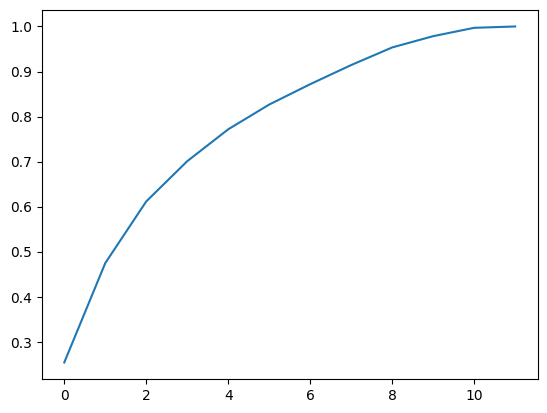

In [86]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))